In [1]:
import scipy.io as sio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
import scipy as sp
from sklearn import preprocessing
import scipy.sparse.linalg
import matplotlib.pyplot as plt
from skimage.filters import sobel

%matplotlib inline


NUM_FRAME = 226
IM_LENGTH = 640
IM_HEIGHT = 480

In [2]:
hdr_cam1_mat = np.asarray(sio.loadmat('cam1_4')['vidFrames1_4'])
hdr_cam2_mat = np.asarray(sio.loadmat('cam2_4')['vidFrames2_4'])
hdr_cam3_mat = np.asarray(sio.loadmat('cam3_4')['vidFrames3_4'])

# A: Animation

## Cam1 

Wall time: 13.2 s


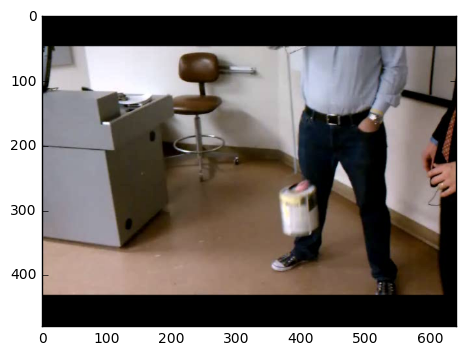

In [4]:
%%time
# First set up the figure
fig1 = plt.figure()

im_hdr_cam1=plt.imshow(hdr_cam1_mat[:,:,:,0])

# animation function.  This is called sequentially
def animate_hdr_cam1(i):
    curr_frame = im_hdr_cam1.set_data(hdr_cam1_mat[:,:,:,i])
    return curr_frame
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim_hdr_cam1 = animation.FuncAnimation(fig1, animate_hdr_cam1, frames=NUM_FRAME, interval=20)

anim_hdr_cam1.save('hdr_cam1.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [6]:
HTML(anim_hdr_cam1.to_html5_video())

## Cam2

Wall time: 13.8 s


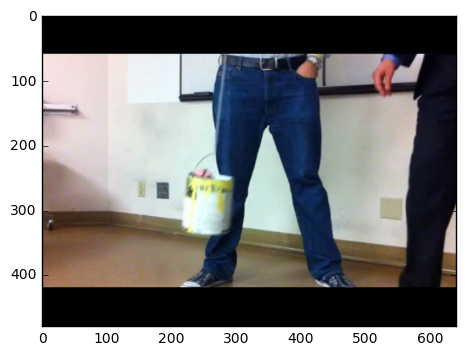

In [7]:
%%time
# First set up the figure
fig2 = plt.figure()

im_hdr_cam2=plt.imshow(hdr_cam2_mat[:,:,:,0])

# animation function.  This is called sequentially
def animate_hdr_cam2(i):
    curr_frame = im_hdr_cam2.set_data(hdr_cam2_mat[:,:,:,i])
    return curr_frame
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim_hdr_cam2 = animation.FuncAnimation(fig2, animate_hdr_cam2, frames=NUM_FRAME, interval=20)

anim_hdr_cam2.save('hdr_cam2.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [8]:
HTML(anim_hdr_cam2.to_html5_video())

## Cam3

Wall time: 14 s


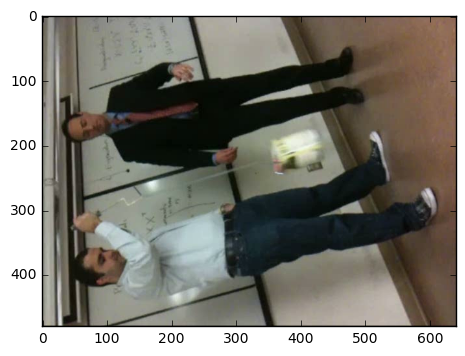

In [9]:
%%time
# First set up the figure
fig3 = plt.figure()

im_hdr_cam3=plt.imshow(hdr_cam3_mat[:,:,:,0])

# animation function.  This is called sequentially
def animate_hdr_cam3(i):
    curr_frame = im_hdr_cam3.set_data(hdr_cam3_mat[:,:,:,i])
    return curr_frame
    
# call the animator.  blit=True means only re-draw the parts that have changed.
anim_hdr_cam3 = animation.FuncAnimation(fig3, animate_hdr_cam3, frames=NUM_FRAME, interval=20)

anim_hdr_cam3.save('hdr_cam3.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

In [10]:
HTML(anim_hdr_cam3.to_html5_video())

# B:Boxing && SVD

## B1) Cam1

In [15]:
%%time
hdr_cam1_matrix2 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = hdr_cam1_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 

    hdr_cam1_matrix2.append(col_curr)

hdr_cam1_matrix2 = np.transpose(np.asarray(hdr_cam1_matrix2).squeeze())

hdr_cam1_matrix2_scaled = preprocessing.scale(hdr_cam1_matrix2) 

U_cam1_p42,Lamda_cam1_p42,V_s_cam1_p42 = sp.sparse.linalg.svds(hdr_cam1_matrix2_scaled,k=100)

print(hdr_cam1_matrix2.shape) 

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(307200, 226)
Wall time: 17.6 s


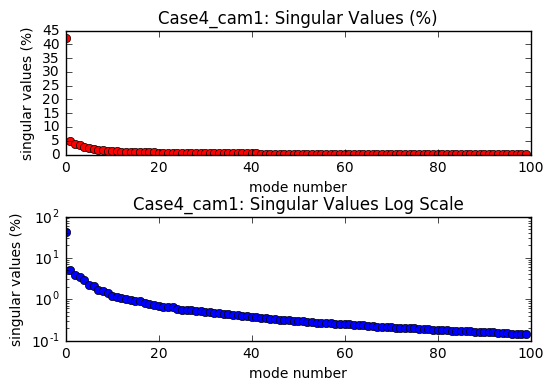

In [16]:
## Plot:
Lamda_cam1_p42_sorted = -np.sort(-Lamda_cam1_p42)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot((Lamda_cam1_p42_sorted/sum(Lamda_cam1_p42_sorted)*100),'ro')

plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Case4_cam1: Singular Values (%)")


plt.subplot(2,1,2)
plt.semilogy(Lamda_cam1_p42_sorted/sum(Lamda_cam1_p42_sorted)*100,'bo')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Case4_cam1: Singular Values Log Scale")
plt.subplots_adjust(hspace=0.5)

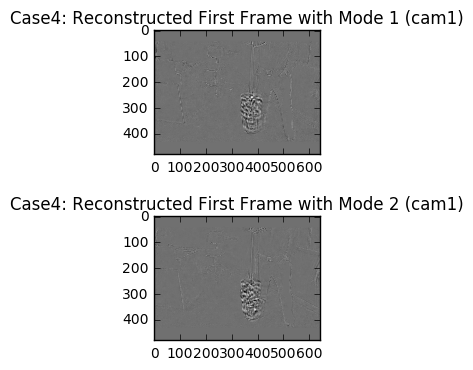

In [21]:
re_cam1_d1 = U_cam1_p42[:,0].reshape(IM_HEIGHT,IM_LENGTH)
re_cam1_d2 = U_cam1_p42[:,1].reshape(IM_HEIGHT,IM_LENGTH)
re_cam1_d3 = U_cam1_p42[:,2].reshape(IM_HEIGHT,IM_LENGTH)

plt.subplot(2,1,1)
plt.imshow(re_cam1_d1, 'gray')
plt.title("Case4: Reconstructed First Frame with Mode 1 (cam1)")

plt.subplot(2,1,2)
plt.imshow(re_cam1_d2, 'gray')
plt.title("Case4: Reconstructed First Frame with Mode 2 (cam1)")

plt.subplots_adjust(hspace=0.5)

## B2) Cam2

In [19]:
%%time
hdr_cam2_matrix2 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = hdr_cam2_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 

    hdr_cam2_matrix2.append(col_curr)

hdr_cam2_matrix2 = np.transpose(np.asarray(hdr_cam2_matrix2).squeeze())

hdr_cam2_matrix2_scaled = preprocessing.scale(hdr_cam2_matrix2) 

U_cam2_p42,Lamda_cam2_p42,V_s_cam2_p42 = sp.sparse.linalg.svds(hdr_cam2_matrix2_scaled,k=100)

print(hdr_cam2_matrix2.shape) 

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(307200, 226)
Wall time: 18.5 s


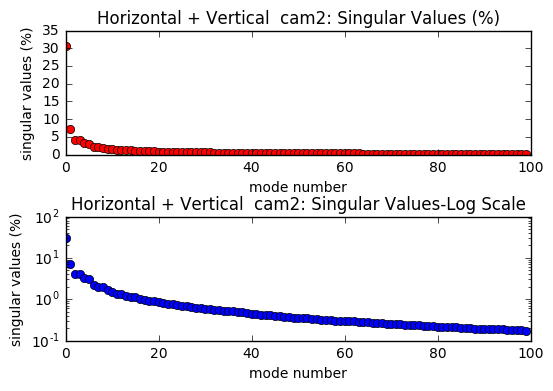

In [20]:
## Plot:
Lamda_cam2_p42_sorted = -np.sort(-Lamda_cam2_p42)
Lamda_cam2_p42_sorted_normed = preprocessing.scale(Lamda_cam2_p42_sorted) 

plt.figure(1)
plt.subplot(2,1,1)
plt.plot((Lamda_cam2_p42_sorted/sum(Lamda_cam2_p42_sorted)*100),'ro')

plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Horizontal + Vertical  cam2: Singular Values (%)")


plt.subplot(2,1,2)
plt.semilogy(Lamda_cam2_p42_sorted/sum(Lamda_cam2_p42_sorted)*100,'bo')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Horizontal + Vertical  cam2: Singular Values-Log Scale")
plt.subplots_adjust(hspace=0.5)

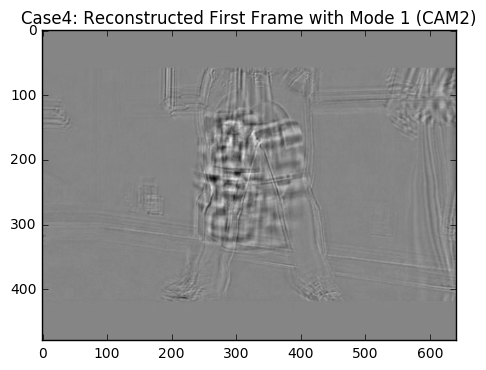

In [22]:
re_cam2_d1 = U_cam2_p42[:,0].reshape(IM_HEIGHT,IM_LENGTH)
re_cam2_d2 = U_cam2_p42[:,1].reshape(IM_HEIGHT,IM_LENGTH)
re_cam2_d3 = U_cam2_p42[:,2].reshape(IM_HEIGHT,IM_LENGTH)

plt.imshow(re_cam2_d1, 'gray')
plt.title("Case4: Reconstructed First Frame with Mode 1 (CAM2)")

## 2c) Cam3

In [23]:
# %%time
hdr_cam3_matrix2 = [] 

col_curr = np.zeros((IM_LENGTH*IM_HEIGHT,1))
for i in range (0,NUM_FRAME):
    col_curr = hdr_cam3_mat[:,:,0,i].reshape(IM_LENGTH*IM_HEIGHT,1), 

    hdr_cam3_matrix2.append(col_curr)

hdr_cam3_matrix2 = np.transpose(np.asarray(hdr_cam3_matrix2).squeeze())

hdr_cam3_matrix2_scaled = preprocessing.scale(hdr_cam3_matrix2) 

U_cam3_p42,Lamda_cam3_p42,V_s_cam3_p42 = sp.sparse.linalg.svds(hdr_cam3_matrix2_scaled,k=100)

print(hdr_cam3_matrix2.shape) 

C:\Users\Zhaokai\Anaconda3\lib\site-packages\sklearn\utils\validation.py:420: DataConversionWarning: Data with input dtype uint8 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


(307200, 226)


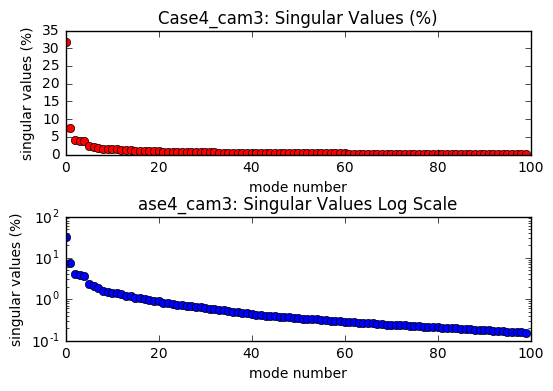

In [24]:
## Plot:
Lamda_cam3_p42_sorted = -np.sort(-Lamda_cam3_p42)
Lamda_cam3_p42_sorted_normed = preprocessing.scale(Lamda_cam3_p42_sorted) 

plt.figure(1)
plt.subplot(2,1,1)
plt.plot((Lamda_cam3_p42_sorted/sum(Lamda_cam3_p42_sorted)*100),'ro')

plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("Case4_cam3: Singular Values (%)")


plt.subplot(2,1,2)
plt.semilogy(Lamda_cam3_p42_sorted/sum(Lamda_cam3_p42_sorted)*100,'bo')
plt.xlabel("mode number")
plt.ylabel("singular values (%)")
plt.title("ase4_cam3: Singular Values Log Scale")
plt.subplots_adjust(hspace=0.5)

# C:Experimental Analysis

## C1) Singular Value Magitude Comparison

In [25]:
cam123_matrix = np.zeros([307200,6])
cam123_matrix[:,0] = U_cam1_p42[:,0] * Lamda_cam1_p42[0]
cam123_matrix[:,1] = U_cam1_p42[:,1] * Lamda_cam1_p42[1]

cam123_matrix[:,2] = U_cam2_p42[:,0] * Lamda_cam2_p42[0]
cam123_matrix[:,3] = U_cam2_p42[:,1] * Lamda_cam2_p42[1]

cam123_matrix[:,4] = U_cam3_p42[:,0] * Lamda_cam3_p42[0]
cam123_matrix[:,5] = U_cam3_p42[:,1] * Lamda_cam3_p42[1]

U,Sigma,V_s = sp.sparse.linalg.svds(cam123_matrix,k=5)

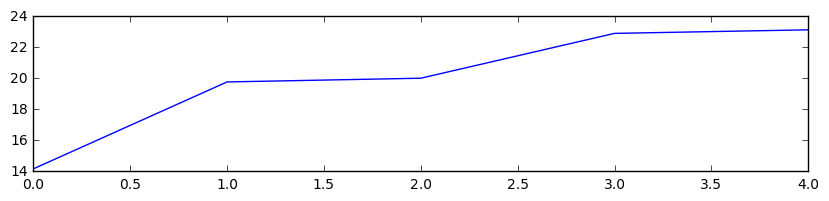

In [26]:
plt.figure(figsize=(10,2))

plt.plot(Sigma/sum(Sigma)*100,'b-')

In [30]:
print(Lamda_cam1_p42[0])
print(Lamda_cam1_p42[1])

print(Lamda_cam2_p42[0])
print(Lamda_cam2_p42[1])

print(Lamda_cam3_p42[0])
print(Lamda_cam3_p42[1])

26.8177236559
27.1331613262
43.8573557093
44.296908082
37.8849871867
38.3438369003


[ 27.12951945  37.87088062  38.33128551  43.87150529  44.3099806 ]


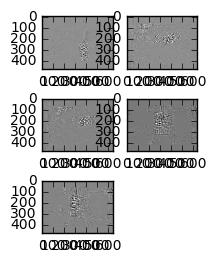

In [41]:
re_1 = U[:,0].reshape(IM_HEIGHT,IM_LENGTH)
re_2 = U[:,1].reshape(IM_HEIGHT,IM_LENGTH)
re_3 = U[:,2].reshape(IM_HEIGHT,IM_LENGTH)
re_4 = U[:,3].reshape(IM_HEIGHT,IM_LENGTH)
re_5 = U[:,4].reshape(IM_HEIGHT,IM_LENGTH)

plt.figure(figsize=(2,3))
plt.subplot(3,2,1)
plt.imshow(re_1,'gray')

plt.subplot(3,2,2)
plt.imshow(re_2,'gray')

plt.subplot(3,2,3)
plt.imshow(re_3,'gray')

plt.subplot(3,2,4)
plt.imshow(re_4,'gray')

plt.subplot(3,2,5)
plt.imshow(re_5,'gray')

print(Sigma)

## Motion Capture

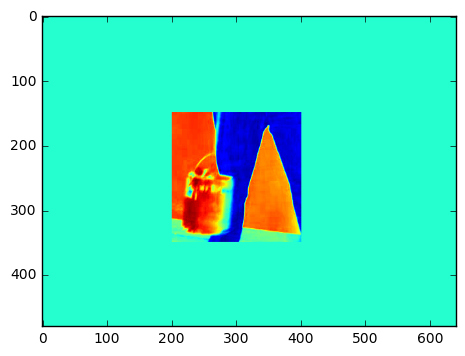

In [35]:
##
#2D mask to 1D mask 

reconstructed_hdr_cam2 = np.dot(U_cam2_p42,np.dot(np.diag(Lamda_cam2_p42),V_s_cam2_p42))

mask_2d = np.zeros([IM_HEIGHT,IM_LENGTH])
for i in range (150,350):
    for j in range (200,400):
        mask_2d[i,j] = 1
        
mask_1d = mask_2d.reshape(IM_HEIGHT*IM_LENGTH,1)
index_mask_1d = np.asarray(np.where(mask_1d == 1)[0])



## Cropping
frame1 = reconstructed_hdr_cam2[:,0]
cropped_frame1 = np.zeros_like(frame1)

for i in index_mask_1d:
    cropped_frame1[i] = frame1[i]
plt.imshow(cropped_frame1.reshape(IM_HEIGHT,IM_LENGTH))    

In [38]:
# %%time
cropped_images = []
markers = []
for i in range(0,NUM_FRAME):
    curr_frame = reconstructed_hdr_cam2[:,i]
    curr_cropped_frame = np.zeros_like(curr_frame)
    
    for j in index_mask_1d:
        curr_cropped_frame[j] = curr_frame[j]
    
    curr_max_pixel = np.amax(curr_cropped_frame)
    curr_marker = np.where(curr_cropped_frame.reshape(IM_HEIGHT,IM_LENGTH) == curr_max_pixel)
    curr_marker_2d = np.asarray(curr_marker).squeeze().reshape(2,1)
    
    
    markers.append(curr_marker_2d)
    
markers = np.transpose(np.asarray(markers).squeeze())
print(markers.shape)

(2, 226)


Horizontal Movement Variance:  2480.82302843
Vertical Movemrnt Variance:  680.790136268


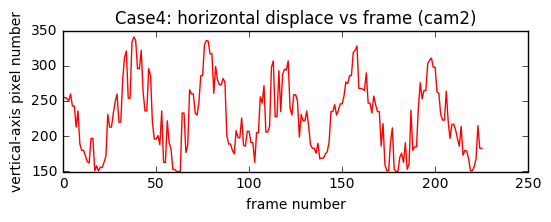

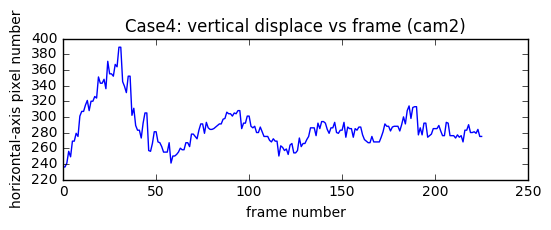

In [40]:
x = markers[0,:]
y = markers[1,:]
n = np.arange(NUM_FRAME)

plt.figure(1)
plt.subplot(2,1,1)
plt.plot(n,x,'r')

plt.title('Case4: horizontal displace vs frame (cam2)') 
plt.xlabel('frame number')
plt.ylabel('vertical-axis pixel number')


plt.figure(2)
plt.subplot(2,1,2)
plt.plot(n,y,'b')
plt.title('Case4: vertical displace vs frame (cam2)') 
plt.xlabel('frame number')
plt.ylabel('horizontal-axis pixel number')


print("Horizontal Movement Variance: ", np.var(x))
print("Vertical Movemrnt Variance: ", np.var(y))

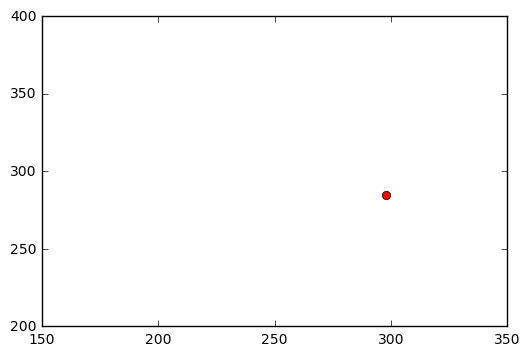

In [57]:
# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(150, 350), ylim=(200, 400))
line, = ax.plot([], [], 'ro')

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x_curr = x[i]
    y_curr = y[i]
    line.set_data(x_curr, y_curr)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=50, blit=True)

anim.save('hdr_movement.mp4', fps=1, extra_args=['-vcodec', 'libx264'])

In [58]:
HTML(anim.to_html5_video())